In [1]:
from scipy.fftpack import dstn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
epsilon_0 = 8.85418782e-12

In [3]:
class DSTpoisson:
    """Solves the poisson equation with a spectral method"""
    def __init__(self, h, Nx, Ny):
        """(Ny, Nx) must be the shape of V, rho"""
        self.h = h
        self.Nx = Nx
        self.Ny = Ny
        self.normalization = 1#4*(Nx-1)*(Ny-1)
        kx, ky = np.meshgrid(np.arange(1, Nx-1, dtype='float') * np.pi / ((Nx-1)*h),
                          np.arange(1, Ny-1, dtype='float') * np.pi / ((Ny-1)*h)
        )
        self.k2 = kx*kx + ky*ky
        
    def solver(self, V, rho):
        """Solves for V the equation: Laplacian(V) = -rho/epsilon_0 with V=0 at the boundaries.
        Content of rho is left unchanged. Content of V is overwritten in the interior.  
        The actual boundaries of V are left untouched by this method (zero being assumed)."""
        rho_hat = dstn(-rho[1:-1, 1:-1]/epsilon_0, type=1, norm = 'ortho')
        rho_hat /= -self.k2*self.normalization
        V[1:-1, 1:-1] = dstn(rho_hat, type=1, norm = 'ortho')
        return V

######################################################################

def Laplacian9(x, h):
    """Returns the isotropic 9-point centered differences Laplacian,
assuming that the mesh size h is the same in the x and y direction.
Note that the size is two units less than the shape of V in each
direction.

    """
    Lapl = (
        x[:-2, :-2] + x[:-2, 2: ] + x[2: , 2:] + x[2:, :-2] + 
        4*(x[:-2, 1:-1] + x[2:, 1:-1] + x[1:-1, :-2] + x[1:-1, 2:])
        - 20*x[1:-1, 1:-1]
    ) / (6*h*h)
    return Lapl

######################################################################

def Laplacian5(x, h):
    """Returns the 5-point centered differences Laplacian, assuming that
the mesh size h is the same in the x and y direction.
Note that the size is two units less than the shape of psi in each direction."""
    Lapl = (
        x[:-2, 1:-1] + x[2:, 1:-1] + x[1:-1, :-2] + x[1:-1, 2:]
        - 4*x[1:-1, 1:-1]
    ) / (h*h)
    return Lapl

In [4]:
Lx = 1.
Ly = 1.
Nx = 81
Ny = Nx
x  = np.linspace(0, Lx, Nx) - Lx/2
y  = np.linspace(0, Ly, Ny) - Ly/2
h  = x[1] - x[0]
elliptic = DSTpoisson(h, Nx, Ny)

In [5]:
#Initial conditions
rho = np.random.randn(Nx, Ny)
V = np.zeros_like(rho)

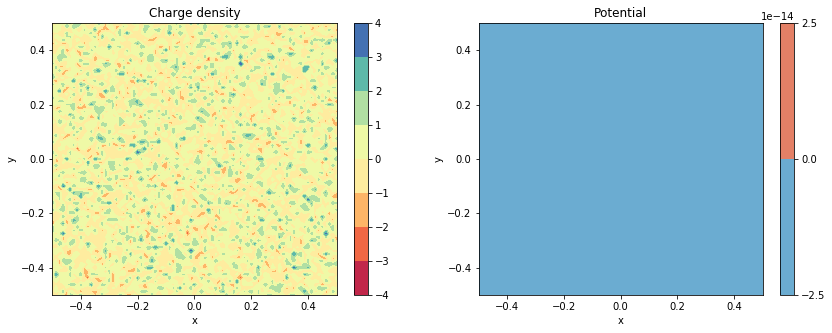

In [6]:
X, Y = np.meshgrid(x, y)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 5))
c1 = axes[1].contourf(Y, X, V, cmap = 'RdBu_r')
axes[1].set_title('Potential')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.colorbar(c1, ax=axes[1]);
c2 = axes[0].contourf(Y, X, rho, cmap = 'Spectral')
axes[0].set_title('Charge density')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
plt.colorbar(c2, ax=axes[0]);

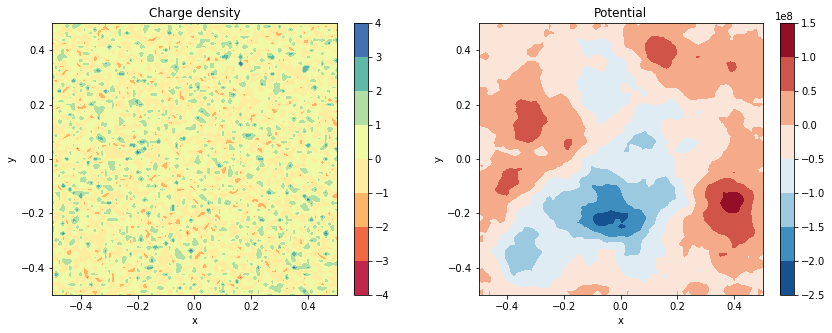

In [7]:
elliptic.solver(V, rho)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 5))
c1 = axes[1].contourf(Y, X, V, cmap = 'RdBu_r')
axes[1].set_title('Potential')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.colorbar(c1, ax=axes[1]);
c2 = axes[0].contourf(Y, X, rho, cmap = 'Spectral')
axes[0].set_title('Charge density')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
plt.colorbar(c2, ax=axes[0]);

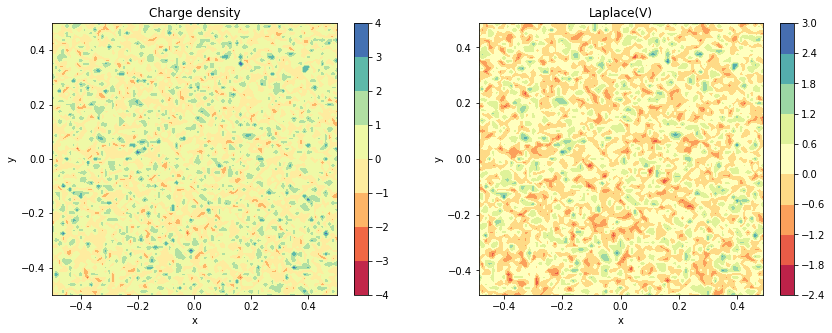

In [8]:
#TO CHECK IF THE LAPLACIAN OF V IS THE CHARGE DENSITY UP TO NORMALISATION (9 POINT LAPLACIAN)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 5))
c1 = axes[1].contourf(Y[1:-1, 1:-1], X[1:-1, 1:-1], -epsilon_0*Laplacian9(V,h), cmap = 'Spectral')
axes[1].set_title('Laplace(V)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
plt.colorbar(c1, ax=axes[1]);
c2 = axes[0].contourf(Y, X, rho, cmap = 'Spectral')
axes[0].set_title('Charge density')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
plt.colorbar(c2, ax=axes[0]);

In [9]:
E = np.gradient(V)

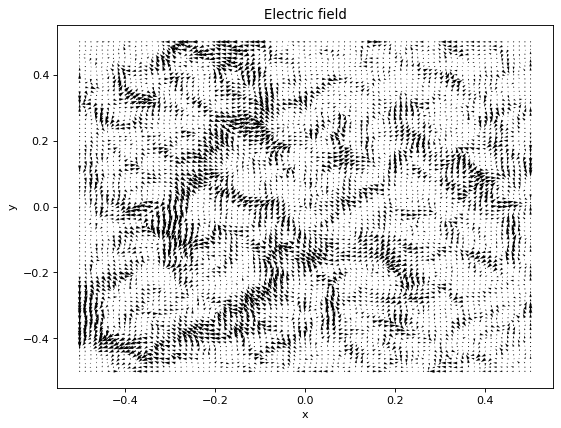

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
plt.quiver(X, Y, E[0], E[1])
plt.title('Electric field')
plt.xlabel('x')
plt.ylabel('y')
plt.show()